In [1]:
import numpy as np

def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

# step-1: 

at low M field use $E = g_f \mu_B B  m_F$, to get $g_f$, then compare with theoratical value of $g_f = \pm $ 1/3 for 85 and $\pm 1/2$ for 87 

$g_f = $Eh/\mu_B B = $. also affirmed by the theoratical prediction of frequency ratio $E(85)/E(87) = g_f(85)/g_f(87)=2/3$, and absorption ratio is related to population of 85 and 87 (the sample contain more 85)


$g_F = \frac{E}{\mu_B B m_F}= \frac{E}{\mu_B  B}$

In [2]:
# B = 0.06*1e-3 # T
B = 0.09*1e-3 # T

muB_in_frequency = 14 # GHz / T

In [3]:
frequency = 380 #kHz
frequency / muB_in_frequency / B *1e-6

0.30158730158730157

In [4]:
frequency = 590 #kHz
frequency / muB_in_frequency / B *1e-6

0.4682539682539683

# low field, derive g factors

total angular momemtum $F = I \pm J$, where $J=1/2$ is the electron spin

for $^{87}Rb$ $I = 3/2$, hyperfine levels are $F = 1,2$

for  $^{85}Rb$ $I = 5/2$, hyperfine levels are $F = 2,3$


In [36]:
def gJ(J, S, L):
    return 1+(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))
def gF(gJ, F, J, I):
    return gJ*(F*(F+1) + J*(J+1)-I*(I+1))/(2*F*(F+1))

In [38]:
# 85 Rb
J = 1/2
S = 1/2
L = 0
F = 2
I = 5/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

-0.3333333333333333

In [40]:
# 85 Rb
J = 1/2
S = 1/2
L = 0
F = 3
I = 5/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

0.3333333333333333

In [42]:
# 87 Rb
J = 1/2
S = 1/2
L = 0
F = 1
I = 3/2
gj = gJ(J, S, L)
gF(gj, F, J, I)

-0.5

In [32]:
# 87 Rb
J = 1/2
S = 1/2
L = 0
F = 2
I = 3/2
gj = gJ(J, S, L)
gF(gj, F, J, I) 

0.5

In [77]:
muB_in_frequency = 14 # GHz / T

def weekfield_frequency(B,#in mili Tesla
              mF,
              gf):
    return  gf * muB_in_frequency * B  * mF # in MHz

In [78]:
hyperfine_spacing = 6.8
B = 1e-1
x = 2 /hyperfine_spacing * muB_in_frequency * B  * 1e-3  # unitless
x

0.00041176470588235307

In [79]:
def strongfield_transition_frequency(mF1,
                                     mF2,
                                     B, # in mT
                                     I):
    assert abs(mF1 - mF2) == 1
    if I == 3/2:
        hyperfine_spacing = 6.8 #GHz   
    elif I == 5/2:
        hyperfine_spacing = 3.1 #GHz   
    gj = 2
    gi = 0
    x = (gj+gi) /hyperfine_spacing * muB_in_frequency* B*1e-3# unitless
    return  hyperfine_spacing /2 * ( np.sqrt(1+4*mF1/(2*I + I)*x + x**2)  - np.sqrt(1+4*mF2/(2*I + I)*x + x**2)   ) *1e3 # MHz

(1.28, 1.32)

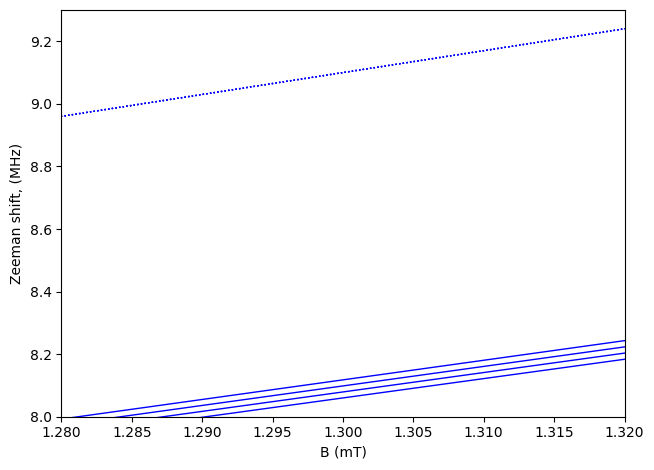

In [88]:
import matplotlib.pyplot as plt

heuristical_lw = {
    3/2: {
        (1,2):0.1,
        (0,1):0.3,
        (-1,0):0.6,
        (-2,-1):1.2,
    },
    5/2: {
        (2,3):0.1,
        (1,2):0.15,
        (0,1):0.15,
        (-1,0):0.4,
        (-2,-1):0.6,
        (-3,-2):1,
    }
}

B_list = np.linspace(0,2,100) # in mT
for I, name in zip([3/2,5/2],
                      ['87','85']):
    
    if I == 3/2:
        gf = 0.5
    else:
        gf = 1/3

    for (mF1,mF2),lw in heuristical_lw[I].items():
        strong_field_freq = []
        for B in B_list:
            strong_field_freq.append(np.abs(strongfield_transition_frequency(mF1=mF1,mF2=mF2,B =B, I = I)))
        plt.plot(B_list,strong_field_freq,label =f'{mF1}->{mF2}',lw=1,color = 'blue' if I == 3/2 else 'red')
    

        weak_field_freq = []
        for B in B_list:
            weak_field_freq.append(np.abs(weekfield_frequency(B,mF1,gf) - weekfield_frequency(B,mF2,gf)))
        plt.plot(B_list,weak_field_freq,label =f'{mF1}->{mF2}',lw=1,linestyle=':',color = 'blue' if I == 3/2 else 'red')


plt.xlabel('B (mT)')
plt.ylabel('Zeeman shift, (MHz)')
plt.tight_layout()

plt.ylim(8,9.3)
plt.xlim(1.28,1.32)

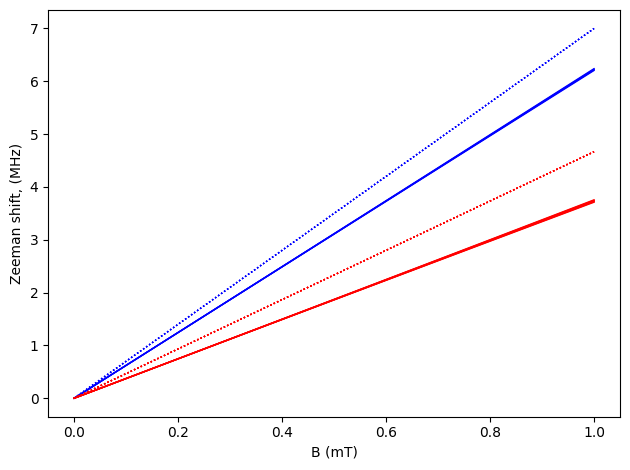

In [89]:
import matplotlib.pyplot as plt

heuristical_lw = {
    3/2: {
        (1,2):0.1,
        (0,1):0.3,
        (-1,0):0.6,
        (-2,-1):1.2,
    },
    5/2: {
        (2,3):0.1,
        (1,2):0.15,
        (0,1):0.15,
        (-1,0):0.4,
        (-2,-1):0.6,
        (-3,-2):1,
    }
}

B_list = np.linspace(0,1,100) # in mT
for I, name in zip([3/2,5/2],
                      ['87','85']):
    
    if I == 3/2:
        gf = 0.5
    else:
        gf = 1/3

    for (mF1,mF2),lw in heuristical_lw[I].items():
        strong_field_freq = []
        for B in B_list:
            strong_field_freq.append(np.abs(strongfield_transition_frequency(mF1=mF1,mF2=mF2,B =B, I = I)))
        plt.plot(B_list,strong_field_freq,label =f'{mF1}->{mF2}',lw=1,color = 'blue' if I == 3/2 else 'red')
    

        weak_field_freq = []
        for B in B_list:
            weak_field_freq.append(np.abs(weekfield_frequency(B,mF1,gf) - weekfield_frequency(B,mF2,gf)))
        plt.plot(B_list,weak_field_freq,label =f'{mF1}->{mF2}',lw=1,linestyle=':',color = 'blue' if I == 3/2 else 'red')


plt.xlabel('B (mT)')
plt.ylabel('Zeeman shift, (MHz)')
plt.tight_layout()

# plt.ylim(8,9.3)
# plt.xlim(1.28,1.32)